## Basic Data Visualization with Matplotlib/Seaborn:

### Objective: Create simple visualizations of data.
### Description:
* Use the same dataset from Task 1.
* Write a Python script that:
* Creates a histogram of a numerical column.
* Creates a bar chart of a categorical column.
* Creates a scatter plot of two numerical columns.
* Learning: Matplotlib/Seaborn basic plotting.
* Deliverable: Python script (.py or .ipynb) and visualization images.

In [1]:
import pandas as pd
data=pd.read_csv("Retail_Dataset.csv")
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-04-25,00:20:38,1,1028,San Antonio,2755,18.27,Groceries,Eggs,Eggs - Standard
1,2,2023-06-09,12:45:55,4,1009,Philadelphia,2239,40.19,Clothing,Shoes,Shoes - Premium
2,3,2023-02-25,10:40:24,3,1016,New York,2301,257.95,Home & Kitchen,Vacuum,Vacuum - Budget
3,4,2023-01-31,00:38:41,8,1012,Los Angeles,2074,319.12,Clothing,Shoes,Shoes - Budget
4,5,2023-10-23,12:37:01,5,1001,Los Angeles,2958,213.57,Electronics,Smartphone,Smartphone - Standard


In [4]:
data.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

In [34]:
data.isna().sum()

transaction_id          0
transaction_date        0
transaction_time        0
transaction_qty         0
store_id                0
store_location          0
product_id              0
unit_price              0
product_category        0
product_type            0
product_detail          0
transaction_datetime    0
year                    0
month                   0
month_year              0
dtype: int64

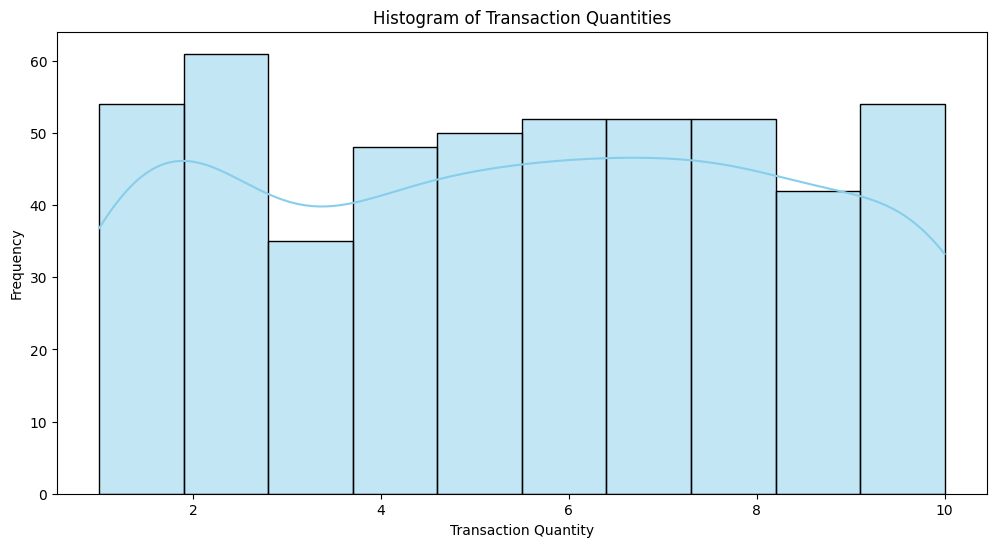

In [32]:
# 1. Create a histogram of a numerical column (e.g., 'transaction_qty')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data['transaction_qty'], kde=True, bins=10, color='skyblue')
plt.title('Histogram of Transaction Quantities')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

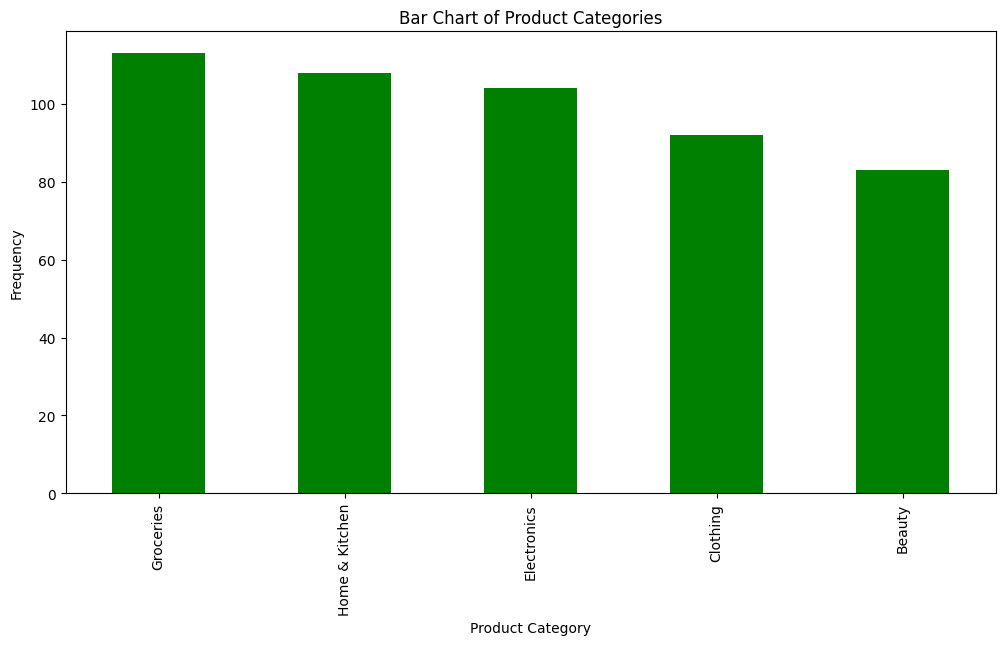

In [ ]:
# 2. Create a bar chart of a categorical column (e.g., 'product_category')
plt.figure(figsize=(12, 6))
data['product_category'].value_counts().plot(kind='bar', color='green')
plt.title('Bar Chart of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

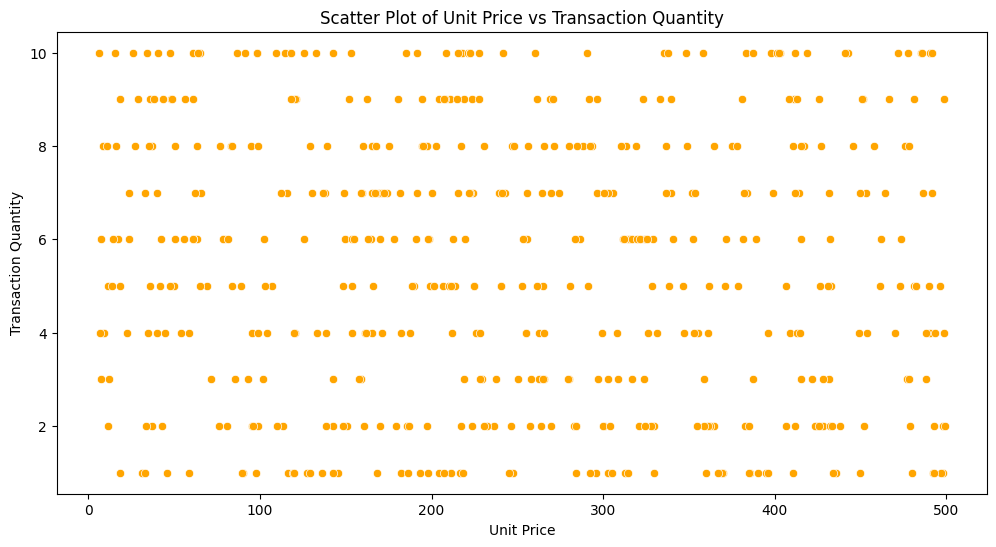

In [30]:
# 3. Create a scatter plot of two numerical columns (e.g., 'unit_price' vs 'transaction_qty')
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['unit_price'], y=data['transaction_qty'], color='orange')
plt.title('Scatter Plot of Unit Price vs Transaction Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')
plt.show()

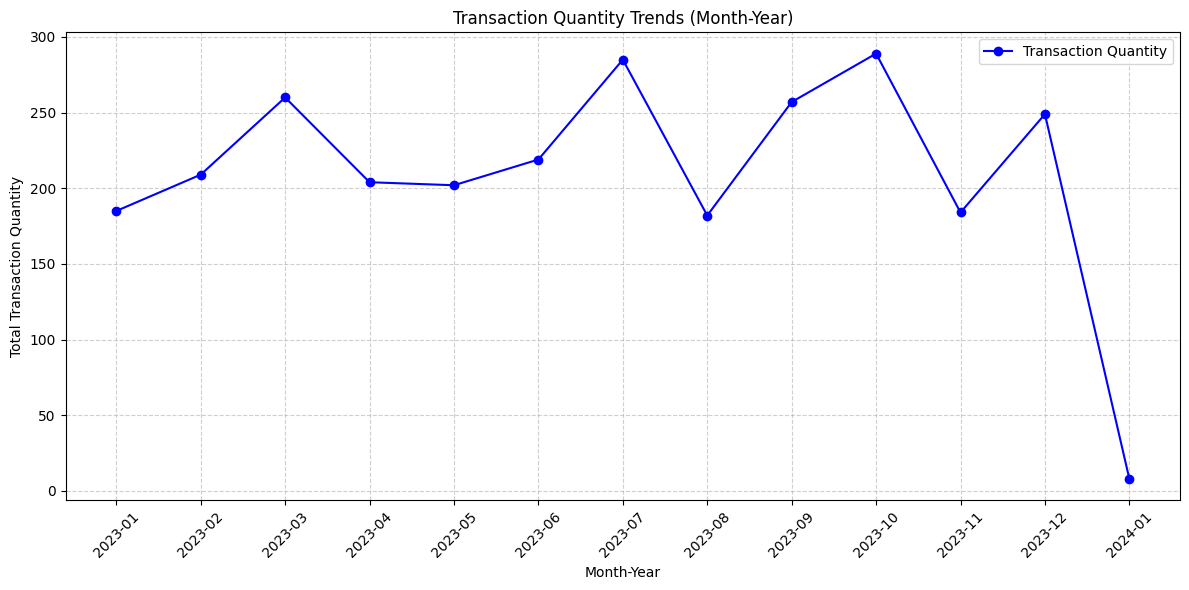

In [16]:
# Combine 'transaction_date' and 'transaction_time' into a datetime column
data['transaction_datetime'] = pd.to_datetime(data['transaction_date'] + ' ' + data['transaction_time'])

# Create a new column for month-year
data['month_year'] = data['transaction_datetime'].dt.to_period('M').astype(str)  # Format: 'YYYY-MM'

# Group by month-year and calculate total transaction quantity
month_year_trends = data.groupby('month_year')['transaction_qty'].sum().reset_index()

# Plot a line chart: Month-Year vs Transaction Quantity
plt.figure(figsize=(12, 6))
plt.plot(month_year_trends['month_year'], month_year_trends['transaction_qty'], marker='o', color='blue', label='Transaction Quantity')
plt.title('Transaction Quantity Trends (Month-Year)')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

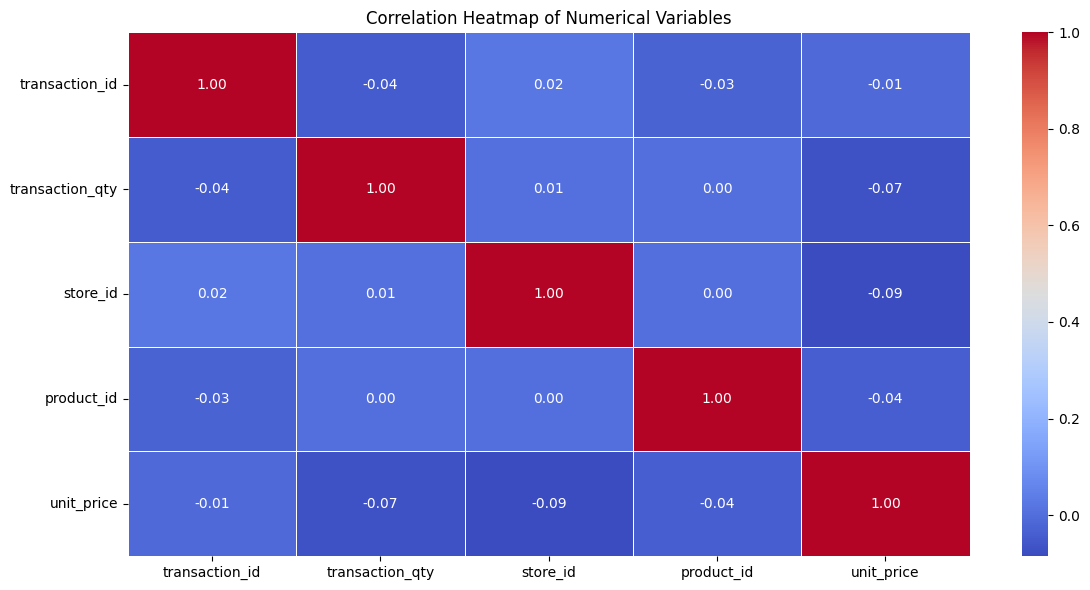

In [29]:
# Select numerical columns for correlation
numerical_data = data.select_dtypes(include=['int64', 'float64'])
#numerical_data = numerical_data.drop(columns=['transaction_id'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")  # Save the plot as an image
plt.show()